In [1]:
import sys, os

env_root = '/N/project/baby_vision_curriculum/pythonenvs/hfenv/lib/python3.10/site-packages/'
sys.path.insert(0, env_root)

In [2]:
import numpy as np
import torch, torchvision
from torchvision import transforms as tr
# from torch import nn
# from torch.nn import functional as F
import os
# import random
# import time
from tqdm import tqdm
from pathlib import Path
# import math
import argparse
import pandas as pd
import warnings
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns


import transformers


In [3]:
def get_tag(fp):
    # g0g1g2, g2g1g0, g3g1g2, grgrgr, g2g2g2
    stem = Path(fp).stem
    parts = stem.split('_')
    glast = parts[3]
    
    if 'pre' in stem:
        gpre = parts[-1]
        gpre = gpre.replace('pre.', '')
        
        full_tag = gpre+glast
    else:
        full_tag = glast
    
    if 'gr' in full_tag:
        return 'grgrgr'
    
    # single stage
    if full_tag=='g0':
        return 'g0g1g2'
    elif full_tag=='g3':
        return 'g3g1g2'
    elif full_tag=='g2':
        return 'g2g1g0'
    
    # 2 stage
    elif full_tag=='g0g1':
        return 'g0g1g2'
    elif full_tag=='g2g1':
        return 'g2g1g0'
    elif full_tag=='g2g2':
        return 'g2g2g2'
    elif full_tag=='g3g1':
        return 'g3g1g2'
    
    else:
        return full_tag
    

def edit_epoch(df, st):
    n_ep = 5
    iter_per_ep = 1000
    df['epoch'] += 1+(st-1)*n_ep
#     new_row = pd.DataFrame({'epoch': [0], 
#                         'train_loss': [1.15],
#                        'val_loss': [1.15]})
#     df = pd.concat([new_row, df]).reset_index(drop=True)
    df['iteration'] = iter_per_ep*df['epoch']
    
    return df

def add_tag(df, tag):
    df['curriculum'] = tag
    return df

def get_ablation_cond(fp):
    stem = Path(fp).stem
    parts = stem.split('_')
    other_id = parts[5]
    cond = other_id[3:]
    return cond
def add_cond(df, cond):
    df['condition'] = cond
    return df

In [4]:
# tagname_dict = {'g0g1g2': 'Dev. (g0-g1-g2)', 
#            'g2g1g0':'Anti-Dev. (g2-g1-g0)',
#            'g3g1g2':'Adult (adult-g1-g2)',
#            'g2g2g2':'Oldest Only (g2-g2-g2)',
#            'grgrgr':'Random (rand-rand-rand)',
#                'g0g0g0': 'Youngest Only (g0-g0-g0)'}
    
    


In [5]:
# hue_order = ['Dev. (g0-g1-g2)',
#             'Anti-Dev. (g2-g1-g0)']

In [6]:
default_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/may14/'

In [7]:


# # default_ablation_cond=
# # Note: the static_frame experiment is different in that there's just one condition in it.
    

# def get_tag(fp):
#     # g0g1g2, g2g1g0, g3g1g2, grgrgr, g2g2g2
#     stem = Path(fp).stem
#     parts = stem.split('_')
#     glast = parts[3]
    
    
    
#     if 'pre' in stem:
#         gpre = parts[-1]
#         gpre = gpre.replace('pre.', '')
        
#         full_tag = gpre+glast
#     else:
#         full_tag = glast
    
# #     if 'gr' in full_tag:
# #         return 'grgrgr'
    
#     # single stage
#     if full_tag=='g0':
#         return 'g0g1g2'+'_'+ablation_cond
# #     elif full_tag=='g3':
# #         return 'g3g1g2'
#     elif full_tag=='g2':
#         return 'g2g1g0'+'_'+ablation_cond
    
#     # 2 stage
#     elif full_tag=='g0g1':
#         return 'g0g1g2'+'_'+ablation_cond
#     elif full_tag=='g2g1':
#         return 'g2g1g0'+'_'+ablation_cond
# #     elif full_tag=='g2g2':
# #         return 'g2g2g2'
# #     elif full_tag=='g3g1':
# #         return 'g3g1g2'
    
#     else:
#         return full_tag+'_'+ablation_cond
    

# def edit_epoch(df, st):
#     n_ep = 5
#     iter_per_ep = 1000
#     df['epoch'] += 1+(st-1)*n_ep
# #     new_row = pd.DataFrame({'epoch': [0], 
# #                         'train_loss': [1.15],
# #                        'val_loss': [1.15]})
# #     df = pd.concat([new_row, df]).reset_index(drop=True)
#     df['iteration'] = iter_per_ep*df['epoch']
    
#     return df

# def add_tag(df, tag):
#     df['curriculum'] = tag
#     return df




In [8]:
def proc_fp_default(fp, stage, ablation_cond):
    df = pd.read_csv(fp).iloc[:,1:]
    df = edit_epoch(df, stage)
    tag = get_tag(fp)
#     ablation_cond = get_ablation_cond(fp) #@@@
    df = add_tag(df, tag)
    df = add_cond(df, ablation_cond)
    return df

def proc_fp(fp, stage):
    df = pd.read_csv(fp).iloc[:,1:]
    df = edit_epoch(df, stage)
    tag = get_tag(fp)
    ablation_cond = get_ablation_cond(fp) #@@@
    df = add_tag(df, tag)
    df = add_cond(df, ablation_cond)
    return df

## Frame Rate

In [40]:
# Default setting
ablation_cond = '30fps'
default_df = []

for stage in range(1,4):
    result_dir = default_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp_default(fp, stage, ablation_cond)
        default_df.append(df)
        
df_def = pd.concat(default_df)
df_def = df_def[['curriculum', 'condition', 'epoch', 'iteration', 'train_loss', 'val_loss']]
df_def = df_def.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})
df_def

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g2g1g0,30fps,1,1000,0.9963,0.9918
1,g2g1g0,30fps,2,2000,0.9943,0.9916
2,g2g1g0,30fps,3,3000,0.9942,0.9915
3,g2g1g0,30fps,4,4000,0.9941,0.9916
4,g2g1g0,30fps,5,5000,0.9941,0.9916
...,...,...,...,...,...,...
0,g0g1g2,30fps,11,11000,0.9289,0.9187
1,g0g1g2,30fps,12,12000,0.9187,0.9057
2,g0g1g2,30fps,13,13000,0.9066,0.8946
3,g0g1g2,30fps,14,14000,0.9004,0.8890


In [41]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/ablations/frame_rate/'

In [42]:
all_df = []

for stage in range(1,4):
    result_dir = result_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp(fp, stage)
        all_df.append(df)
        
df_all = pd.concat(all_df)
df_all = df_all[['curriculum', 'condition','epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})

# add the ablation condition to the dataframe
df_all = pd.concat((df_all, df_def)) #add the default condition
df_all

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g0g1g2,15fps,1,1000,0.9969,0.9877
1,g0g1g2,15fps,2,2000,0.9945,0.9867
2,g0g1g2,15fps,3,3000,0.9908,0.9850
3,g0g1g2,15fps,4,4000,0.9754,0.9733
4,g0g1g2,15fps,5,5000,0.9606,0.9652
...,...,...,...,...,...,...
0,g0g1g2,30fps,11,11000,0.9289,0.9187
1,g0g1g2,30fps,12,12000,0.9187,0.9057
2,g0g1g2,30fps,13,13000,0.9066,0.8946
3,g0g1g2,30fps,14,14000,0.9004,0.8890


In [43]:
hue_order = ['g0g1g2',
            'g2g1g0']
style_order=['10fps','15fps','30fps']

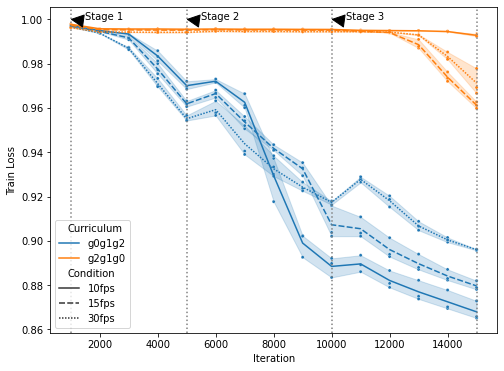

In [44]:
cdata = df_all
# [(df_all['Curriculum']!='Youngest Only (g0-g0-g0)') &
#               (df_all['Curriculum']!='Oldest Only (g2-g2-g2)')]

fig,ax = plt.subplots(1,1, figsize=(8,6))
sns.lineplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', style='Condition', ax=ax,
            hue_order=hue_order, style_order=style_order)
sns.scatterplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10,
               hue_order=hue_order)
# sns.lineplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, linestyle='--', legend=False,
#             hue_order=hue_order)
# sns.scatterplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10,
#                hue_order=hue_order)

ax.axvline(x=1000, color='gray', linestyle=':')
ax.axvline(x=5000, color='gray', linestyle=':')
ax.axvline(x=10000, color='gray', linestyle=':')
ax.axvline(x=15000, color='gray', linestyle=':')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('fig_convergence_frame_rate.pdf', dpi=300)

## Number of Iterations

In [31]:
# Default setting
ablation_cond = 'nep5'
default_df = []

for stage in range(1,4):
    result_dir = default_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp_default(fp, stage, ablation_cond)
        default_df.append(df)
        
df_def = pd.concat(default_df)
df_def = df_def[['curriculum', 'condition', 'epoch', 'iteration', 'train_loss', 'val_loss']]
df_def = df_def.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})
df_def

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g2g1g0,nep5,1,1000,0.9963,0.9918
1,g2g1g0,nep5,2,2000,0.9943,0.9916
2,g2g1g0,nep5,3,3000,0.9942,0.9915
3,g2g1g0,nep5,4,4000,0.9941,0.9916
4,g2g1g0,nep5,5,5000,0.9941,0.9916
...,...,...,...,...,...,...
0,g0g1g2,nep5,11,11000,0.9289,0.9187
1,g0g1g2,nep5,12,12000,0.9187,0.9057
2,g0g1g2,nep5,13,13000,0.9066,0.8946
3,g0g1g2,nep5,14,14000,0.9004,0.8890


In [32]:
def edit_epoch(df, st):
    n_ep = df['epoch'].iloc[-1]+1#5 #n_epoch per stage
    iter_per_ep = 1000
    df['epoch'] += 1+(st-1)*n_ep
#     new_row = pd.DataFrame({'epoch': [0], 
#                         'train_loss': [1.15],
#                        'val_loss': [1.15]})
#     df = pd.concat([new_row, df]).reset_index(drop=True)
    df['iteration'] = iter_per_ep*df['epoch']
    
    return df

In [33]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/ablations/num_ep/'

In [34]:
# # fix the filenames
# for stage in range(1,4):
#     result_dir = result_root+'s'+str(stage)+'/'
#     directory = result_dir
#     for filename in os.listdir(directory):
#         if 'n_ep2' in filename:
#             new_filename = filename.replace('n_ep2', 'nep2')
#             old_path = os.path.join(directory, filename)
#             new_path = os.path.join(directory, new_filename)
#             os.rename(old_path, new_path)


In [35]:
all_df = []

for stage in range(1,4):
    result_dir = result_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp(fp, stage)
        all_df.append(df)
        
df_all = pd.concat(all_df)
df_all = df_all[['curriculum', 'condition','epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})

# add the ablation condition to the dataframe
df_all = pd.concat((df_all, df_def)) #add the default condition
df_all

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g2g1g0,nep2,1,1000,0.9969,0.9915
1,g2g1g0,nep2,2,2000,0.9949,0.9916
0,g0g1g2,nep2,1,1000,0.9966,0.9871
1,g0g1g2,nep2,2,2000,0.9939,0.9862
0,g2g1g0,nep15,1,1000,0.9968,0.9915
...,...,...,...,...,...,...
0,g0g1g2,nep5,11,11000,0.9289,0.9187
1,g0g1g2,nep5,12,12000,0.9187,0.9057
2,g0g1g2,nep5,13,13000,0.9066,0.8946
3,g0g1g2,nep5,14,14000,0.9004,0.8890


In [36]:
df_all['Condition'].unique()

array(['nep2', 'nep15', 'nep5'], dtype=object)

In [37]:
hue_order = ['g0g1g2',
            'g2g1g0']
style_order=['nep2','nep5','nep15']

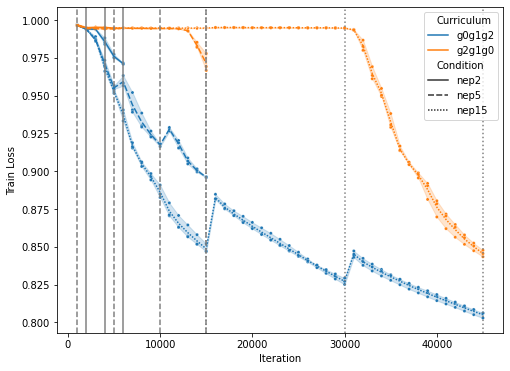

In [39]:
cdata = df_all
# [(df_all['Curriculum']!='Youngest Only (g0-g0-g0)') &
#               (df_all['Curriculum']!='Oldest Only (g2-g2-g2)')]

fig,ax = plt.subplots(1,1, figsize=(8,6))
sns.lineplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', style='Condition', ax=ax,
            hue_order=hue_order, style_order=style_order)
sns.scatterplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10,
               hue_order=hue_order)
# sns.lineplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, linestyle='--', legend=False,
#             hue_order=hue_order)
# sns.scatterplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10,
#                hue_order=hue_order)

ax.axvline(x=1000, color='gray', linestyle='dashed')

ax.axvline(x=2000, color='gray', linestyle='solid')
ax.axvline(x=4000, color='gray', linestyle='solid')
ax.axvline(x=6000, color='gray', linestyle='solid')

ax.axvline(x=5000, color='gray', linestyle='dashed')
ax.axvline(x=10000, color='gray', linestyle='dashed')
ax.axvline(x=15000, color='gray', linestyle='dashed')

ax.axvline(x=15000, color='gray', linestyle='dotted')
ax.axvline(x=30000, color='gray', linestyle='dotted')
ax.axvline(x=45000, color='gray', linestyle='dotted')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
# ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('fig_convergence_num_ep.pdf', dpi=300)

## Optimizer

In [19]:
# Default setting
ablation_cond = 'sgd'
default_df = []

for stage in range(1,4):
    result_dir = default_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp_default(fp, stage, ablation_cond)
        default_df.append(df)
        
df_def = pd.concat(default_df)
df_def = df_def[['curriculum', 'condition', 'epoch', 'iteration', 'train_loss', 'val_loss']]
df_def = df_def.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})
df_def

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g2g1g0,sgd,1,1000,0.9963,0.9918
1,g2g1g0,sgd,2,2000,0.9943,0.9916
2,g2g1g0,sgd,3,3000,0.9942,0.9915
3,g2g1g0,sgd,4,4000,0.9941,0.9916
4,g2g1g0,sgd,5,5000,0.9941,0.9916
...,...,...,...,...,...,...
0,g0g1g2,sgd,11,11000,0.9289,0.9187
1,g0g1g2,sgd,12,12000,0.9187,0.9057
2,g0g1g2,sgd,13,13000,0.9066,0.8946
3,g0g1g2,sgd,14,14000,0.9004,0.8890


In [20]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/ablations/optim/'

In [21]:
# import os
# import shutil

# # Specify the source directory where the files are located
# source_directory = '/N/project/baby_vision_curriculum/trained_models/generative/v2/ablations/optim_adam_highlr/s1/'


# # Specify the destination directory where you want to move the files
# destination_directory = result_root+'s1/'

# # Create the destination directory if it doesn't exist
# os.makedirs(destination_directory, exist_ok=True)

# # Iterate over the files in the source directory
# for filename in os.listdir(source_directory):
#     # Check if the file name contains 'seed_22'
#     if 'adamw' in filename:
#         # Get the full path of the file
#         file_path = os.path.join(source_directory, filename)
#         # Move the file to the destination directory
#         shutil.move(file_path, destination_directory)


In [22]:
all_df = []

for stage in range(1,4):
    result_dir = result_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp(fp, stage)
        all_df.append(df)
        
df_all = pd.concat(all_df)
df_all = df_all[['curriculum', 'condition','epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})

# add the ablation condition to the dataframe
df_all = pd.concat((df_all, df_def)) #add the default condition
df_all

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g0g1g2,adam,1,1000,0.9778,0.9729
1,g0g1g2,adam,2,2000,0.9504,0.9657
2,g0g1g2,adam,3,3000,0.9336,0.9506
3,g0g1g2,adam,4,4000,0.9114,0.9278
4,g0g1g2,adam,5,5000,0.8790,0.9006
...,...,...,...,...,...,...
0,g0g1g2,sgd,11,11000,0.9289,0.9187
1,g0g1g2,sgd,12,12000,0.9187,0.9057
2,g0g1g2,sgd,13,13000,0.9066,0.8946
3,g0g1g2,sgd,14,14000,0.9004,0.8890


In [23]:
df_all['Condition'].unique()

array(['adam', 'adamw', 'sgd'], dtype=object)

In [24]:
hue_order = ['g0g1g2',
            'g2g1g0']
style_order=['sgd','adam','adamw']

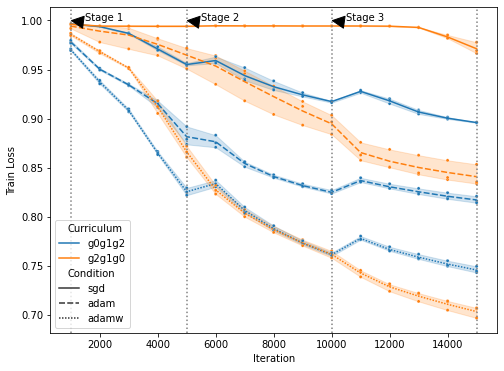

In [30]:
cdata = df_all
# [(df_all['Curriculum']!='Youngest Only (g0-g0-g0)') &
#               (df_all['Curriculum']!='Oldest Only (g2-g2-g2)')]

fig,ax = plt.subplots(1,1, figsize=(8,6))
sns.lineplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', style='Condition', ax=ax,
            hue_order=hue_order, style_order=style_order)
sns.scatterplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10,
               hue_order=hue_order)
# sns.lineplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, linestyle='--', legend=False,
#             hue_order=hue_order)
# sns.scatterplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10,
#                hue_order=hue_order)

ax.axvline(x=1000, color='gray', linestyle=':')
ax.axvline(x=5000, color='gray', linestyle=':')
ax.axvline(x=10000, color='gray', linestyle=':')
ax.axvline(x=15000, color='gray', linestyle=':')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('fig_sup_convergence_optim.pdf', dpi=300)

## Static Frame

In [15]:
# Default setting
ablation_cond = 'video'
default_df = []

for stage in range(1,4):
    result_dir = default_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp_default(fp, stage, ablation_cond)
        default_df.append(df)
        
df_def = pd.concat(default_df)
df_def = df_def[['curriculum', 'condition', 'epoch', 'iteration', 'train_loss', 'val_loss']]
df_def = df_def.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})
df_def

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g2g1g0,video,1,1000,0.9963,0.9918
1,g2g1g0,video,2,2000,0.9943,0.9916
2,g2g1g0,video,3,3000,0.9942,0.9915
3,g2g1g0,video,4,4000,0.9941,0.9916
4,g2g1g0,video,5,5000,0.9941,0.9916
...,...,...,...,...,...,...
0,g0g1g2,video,11,11000,0.9289,0.9187
1,g0g1g2,video,12,12000,0.9187,0.9057
2,g0g1g2,video,13,13000,0.9066,0.8946
3,g0g1g2,video,14,14000,0.9004,0.8890


In [16]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/ablations/static_frame/'

In [17]:
all_df = []

for stage in range(1,4):
    result_dir = result_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp(fp, stage)
        df['condition'] = 'static_frame' #@@@
        all_df.append(df)
        
df_all = pd.concat(all_df)
df_all = df_all[['curriculum', 'condition','epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})

# add the ablation condition to the dataframe
df_all = pd.concat((df_all, df_def)) #add the default condition
df_all

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,grgrgr,static_frame,1,1000,0.9959,0.9932
1,grgrgr,static_frame,2,2000,0.9939,0.9905
2,grgrgr,static_frame,3,3000,0.9936,0.9886
3,grgrgr,static_frame,4,4000,0.9914,0.9726
4,grgrgr,static_frame,5,5000,0.9746,0.9604
...,...,...,...,...,...,...
0,g0g1g2,video,11,11000,0.9289,0.9187
1,g0g1g2,video,12,12000,0.9187,0.9057
2,g0g1g2,video,13,13000,0.9066,0.8946
3,g0g1g2,video,14,14000,0.9004,0.8890


In [18]:
df_all['Condition'].unique()

array(['static_frame', 'video'], dtype=object)

In [19]:
hue_order = ['g0g1g2',
            'g2g1g0']
style_order=['video','static_frame']

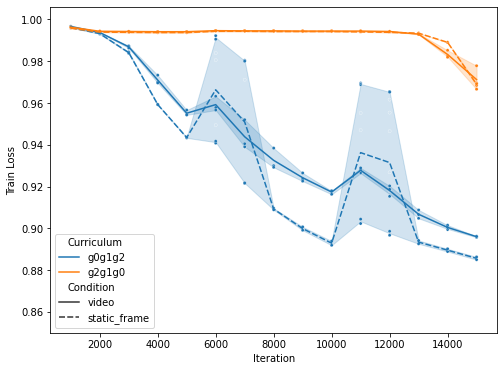

In [22]:
cdata = df_all
# [(df_all['Curriculum']!='Youngest Only (g0-g0-g0)') &
#               (df_all['Curriculum']!='Oldest Only (g2-g2-g2)')]

fig,ax = plt.subplots(1,1, figsize=(8,6))
sns.lineplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', style='Condition', ax=ax,
            hue_order=hue_order, style_order=style_order)
sns.scatterplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10,
               hue_order=hue_order)
# sns.lineplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', style='Condition', ax=ax,
#             hue_order=hue_order, style_order=style_order)
# sns.scatterplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10,
#                hue_order=hue_order)

# ax.axvline(x=1000, color='gray', linestyle=':')
# ax.axvline(x=5000, color='gray', linestyle=':')
# ax.axvline(x=10000, color='gray', linestyle=':')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
# ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('fig_sup_convergence_static.pdf', dpi=300)

## Shuffle frames

In [9]:
# Default setting
ablation_cond = 'ordered'
default_df = []

for stage in range(1,4):
    result_dir = default_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp_default(fp, stage, ablation_cond)
        default_df.append(df)
        
df_def = pd.concat(default_df)
df_def = df_def[['curriculum', 'condition', 'epoch', 'iteration', 'train_loss', 'val_loss']]
df_def = df_def.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})
df_def

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g2g1g0,ordered,1,1000,0.9963,0.9918
1,g2g1g0,ordered,2,2000,0.9943,0.9916
2,g2g1g0,ordered,3,3000,0.9942,0.9915
3,g2g1g0,ordered,4,4000,0.9941,0.9916
4,g2g1g0,ordered,5,5000,0.9941,0.9916
...,...,...,...,...,...,...
0,g0g1g2,ordered,11,11000,0.9289,0.9187
1,g0g1g2,ordered,12,12000,0.9187,0.9057
2,g0g1g2,ordered,13,13000,0.9066,0.8946
3,g0g1g2,ordered,14,14000,0.9004,0.8890


In [10]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/ablations/shuffle/'

In [11]:
ablation_cond = 'shuffled'
all_df = []

for stage in range(1,4):
    result_dir = result_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp(fp, stage)
        df['condition'] = ablation_cond #@@@
        all_df.append(df)
        
df_all = pd.concat(all_df)
df_all = df_all[['curriculum', 'condition','epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})

# add the ablation condition to the dataframe
df_all = pd.concat((df_all, df_def)) #add the default condition
df_all

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g0g1g2,shuffled,1,1000,0.9975,0.9874
1,g0g1g2,shuffled,2,2000,0.9953,0.9865
2,g0g1g2,shuffled,3,3000,0.9942,0.9873
3,g0g1g2,shuffled,4,4000,0.9883,0.9837
4,g0g1g2,shuffled,5,5000,0.9751,0.9691
...,...,...,...,...,...,...
0,g0g1g2,ordered,11,11000,0.9289,0.9187
1,g0g1g2,ordered,12,12000,0.9187,0.9057
2,g0g1g2,ordered,13,13000,0.9066,0.8946
3,g0g1g2,ordered,14,14000,0.9004,0.8890


In [12]:
hue_order = ['g0g1g2',
            'g2g1g0']
style_order=['ordered','shuffled']

<AxesSubplot:xlabel='Iteration', ylabel='Validation Loss'>

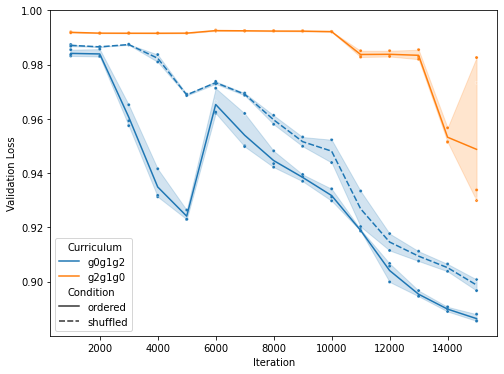

In [14]:
cdata = df_all
# [(df_all['Curriculum']!='Youngest Only (g0-g0-g0)') &
#               (df_all['Curriculum']!='Oldest Only (g2-g2-g2)')]

fig,ax = plt.subplots(1,1, figsize=(8,6))
# sns.lineplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', style='Condition', ax=ax,
#             hue_order=hue_order, style_order=style_order)
# sns.scatterplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10,
#                hue_order=hue_order)

sns.lineplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', style='Condition', ax=ax,
            hue_order=hue_order, style_order=style_order)
sns.scatterplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10,
               hue_order=hue_order)

# sns.lineplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, linestyle='--', legend=False,
#             hue_order=hue_order)
# sns.scatterplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10,
#                hue_order=hue_order)

# ax.axvline(x=1000, color='gray', linestyle=':')
# ax.axvline(x=5000, color='gray', linestyle=':')
# ax.axvline(x=10000, color='gray', linestyle=':')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
# ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
#             arrowprops=dict(facecolor='black', shrink=0.05))

# plt.savefig('fig_ablation_convergence_shuffle.pdf', dpi=300)

## Slowness

In [21]:
def get_tag(fp):
    # g0g1g2, g2g1g0, g3g1g2, grgrgr, g2g2g2
    stem = Path(fp).stem
    parts = stem.split('_')
    glast = parts[3]
    
    if 'pre' in stem:
        gpre = parts[-1]
        gpre = gpre.replace('pre.', '')
        
        full_tag = gpre+glast
    else:
        full_tag = glast
    
    if 'gr' in full_tag:
        return 'grgrgr'
    
    # single stage
    if full_tag=='g0':
        return 'g0g1g2'
    elif full_tag=='g3':
        return 'g3g1g2'
    elif full_tag=='g2':
        return 'g2g1g0'
    
    # 2 stage
    elif full_tag=='g0g1':
        return 'g0g1g2'
    elif full_tag=='g2g1':
        return 'g2g1g0'
    elif full_tag=='g2g2':
        return 'g2g2g2'
    elif full_tag=='g3g1':
        return 'g3g1g2'
    
    else:
        return full_tag
    

def edit_epoch(df, st):
    n_ep = 5
    iter_per_ep = 1000
    df['epoch'] += 1+(st-1)*n_ep
#     new_row = pd.DataFrame({'epoch': [0], 
#                         'train_loss': [1.15],
#                        'val_loss': [1.15]})
#     df = pd.concat([new_row, df]).reset_index(drop=True)
    df['iteration'] = iter_per_ep*df['epoch']
    
    return df

def add_tag(df, tag):
    df['curriculum'] = tag
    return df

def get_ablation_cond(fp):
    stem = Path(fp).stem
    parts = stem.split('_')
#     other_id = parts[5]
    cond = parts[6]
    return cond
def add_cond(df, cond):
    df['condition'] = cond
    return df


def proc_fp(fp, stage):
    df = pd.read_csv(fp).iloc[:,1:]
    df = edit_epoch(df, stage)
    tag = get_tag(fp)
    ablation_cond = get_ablation_cond(fp) #@@@
    df = add_tag(df, tag)
    df = add_cond(df, ablation_cond)
    return df

In [16]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/v2/ablations/slowness/'

In [17]:
all_df = []

for stage in range(1,4):
    result_dir = result_root+'s'+str(stage)+'/'
    result_files = [result_dir+item
               for item in os.listdir(result_dir)
               if item.split('_')[0]=='train']
    for fp in result_files:
        df = proc_fp(fp, stage)
        all_df.append(df)
        
df_all = pd.concat(all_df)
df_all = df_all[['curriculum', 'condition','epoch', 'iteration', 'train_loss', 'val_loss']]
df_all = df_all.rename(columns={
    'curriculum': 'Curriculum',
    'condition': 'Condition',
    'epoch': 'Epoch',
    'iteration': 'Iteration',
    'train_loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})

# add the ablation condition to the dataframe
# df_all = pd.concat((df_all, df_def)) #add the default condition
df_all

,Curriculum,Condition,Epoch,Iteration,Train Loss,Validation Loss
0,g0g1g2,default,1,1000,0.9972,0.9760
1,g0g1g2,default,2,2000,0.9949,0.9757
2,g0g1g2,default,3,3000,0.9935,0.9767
3,g0g1g2,default,4,4000,0.9833,0.9645
4,g0g1g2,default,5,5000,0.9694,0.9560
...,...,...,...,...,...,...
0,g0g1g2,shuffle,11,11000,0.8411,0.8917
1,g0g1g2,shuffle,12,12000,0.8314,0.8806
2,g0g1g2,shuffle,13,13000,0.8192,0.8657
3,g0g1g2,shuffle,14,14000,0.8112,0.8614


In [18]:
hue_order = ['g0g1g2',
            'g2g1g0']
style_order=['static','default','shuffle']

Text(10500, 1, 'Stage 3')

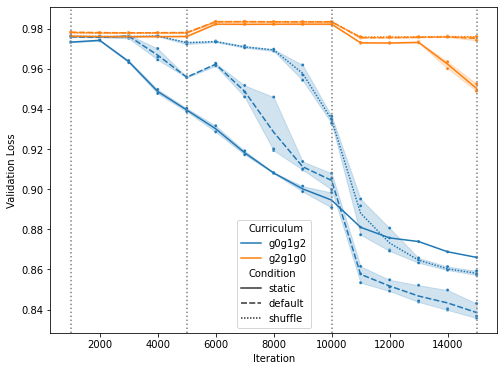

In [20]:
cdata = df_all
# [(df_all['Curriculum']!='Youngest Only (g0-g0-g0)') &
#               (df_all['Curriculum']!='Oldest Only (g2-g2-g2)')]

fig,ax = plt.subplots(1,1, figsize=(8,6))
# sns.lineplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', style='Condition', ax=ax,
#             hue_order=hue_order, style_order=style_order)
# sns.scatterplot(data=cdata, x='Iteration', y='Train Loss', hue='Curriculum', ax=ax, legend=False, s=10,
#                hue_order=hue_order)
sns.lineplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', style='Condition', ax=ax,
            hue_order=hue_order, style_order=style_order)
sns.scatterplot(data=cdata, x='Iteration', y='Validation Loss', hue='Curriculum', ax=ax, legend=False, s=10,
               hue_order=hue_order)

ax.axvline(x=1000, color='gray', linestyle=':')
ax.axvline(x=5000, color='gray', linestyle=':')
ax.axvline(x=10000, color='gray', linestyle=':')
ax.axvline(x=15000, color='gray', linestyle=':')


# Add annotations to the vertical lines
# ax.set_xlim([-500,15000])
ax.annotate('Stage 1', xy=(1000, 1), xytext=(1500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 2', xy=(5000, 1), xytext=(5500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Stage 3', xy=(10000, 1), xytext=(10500, 1),
            arrowprops=dict(facecolor='black', shrink=0.05))

# plt.savefig('fig_sup_convergence_optim.pdf', dpi=300)